In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('../../data/cleanData/OHE_PA.csv')

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            41 non-null     int64
 1   Business                                              41 non-null     int64
 2   Engineering (if you're computer science choose this)  41 non-null     int64
 3   Sciences                                              41 non-null     int64
 4   Junior                                                41 non-null     int64
 5   Alumni                                                41 non-null     int64
 6   Sophomore                                             41 non-null     int64
 7   Freshman                                              41 non-null     int64
 8   Senior                                                41 non-null     int64
 9   B

In [40]:
'''
combinations we agreed on
'''

dfi = df

music = df.loc[:,'indie':'Musical/Theatre']
humor = df.loc[:,'Blues':'Situational']
friday = df.loc[:,'Studying':'At a party/With Friends']
busy = df.loc[:,'5-8 hours of school and/or work a day':'8+ hours of school and/or work a day']
genre = df.loc[:,'Action':'Emotional']
sports = df.loc[:,'No':'Yes']

# personal, friendship, humour
dfii = pd.concat([music, humor,friday], axis=1)

# entertainment, sports, friday night
dfiii = pd.concat([music, genre, sports, friday], axis=1)

# music_genre, entertainment_Genre, sports, humour
dfiv = pd.concat([music, genre, sports, humor], axis=1)

alldfs = [ dfi, dfii,dfiii,dfiv ]

In [19]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_samples, silhouette_score

In [22]:
covariance_types = ['full', 'tied', 'diag', 'spherical']
def gmm_n_comp(X, covar_type):
    n_components = np.arange(1, 21)
    models = [GaussianMixture(n, covariance_type=covar_type, random_state=0).fit(X) for n in n_components]

    plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
    plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
    plt.legend(loc='best')
    plt.xlabel('n_components')
#     plt.show()
    
def allgm(X):
    for covar_type in covariance_types:
        gmm_n_comp(X,covar_type)
        
def gmm(X, n_components, co_type):
    gmm = GaussianMixture(n_components=n_components, covariance_type=co_type, random_state=0)
    gmm_labels = gmm.fit_predict(X)
    return (silhouette_score(X, gmm_labels))

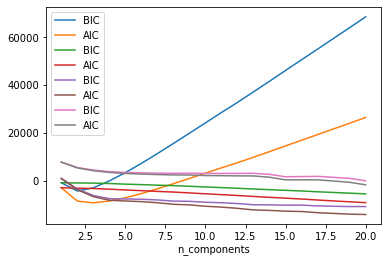

In [23]:
Xi = dfi.values
res_i = allgm(Xi)

In [25]:
res = gmm(Xi, 3, 'full')
print(res)

0.48638479758649533


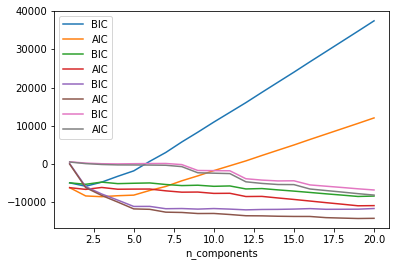

In [26]:
Xii = dfii.values
res_ii = allgm(Xii)

In [28]:
res = gmm(Xii, 3, 'full')
print(res)

0.16327647095291942


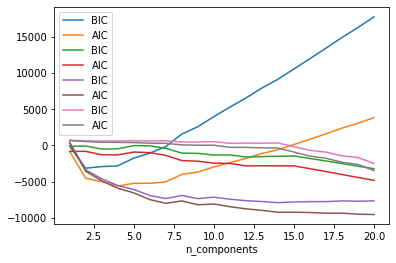

In [30]:
Xiii = dfiii.values
res_iii = allgm(Xiii)

In [32]:
res = gmm(Xii, 5, 'diag')
print(res)

0.1997796487140506


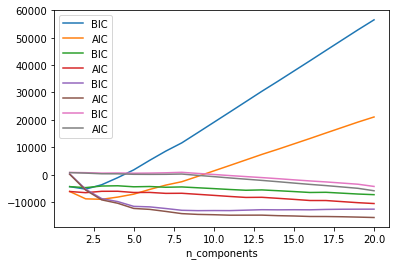

In [37]:
Xiv = dfiv.values
res_iv = allgm(Xiv)

In [39]:
res = gmm(Xiv, 3, 'diag')
print(res)

0.1591171090458813


# HAC

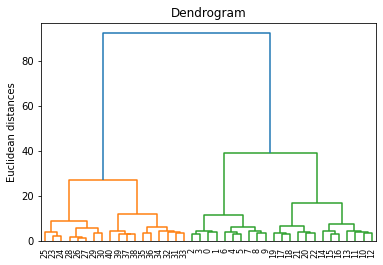

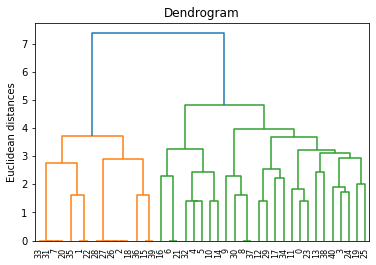

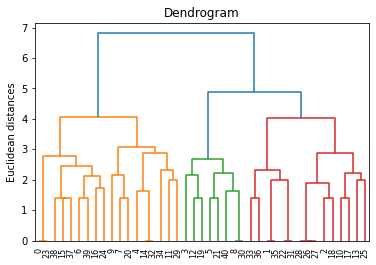

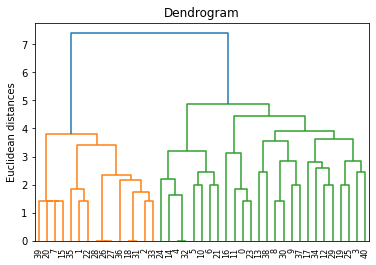

'\ni 3\nii 3\niii 3,5\n'

In [41]:
import scipy.cluster.hierarchy as sch

variations = [Xi, Xii, Xiii, Xiv]
for X in variations:
    dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
    plt.title('Dendrogram')
    plt.ylabel('Euclidean distances')
    plt.show()
'''
i 3
ii 3
iii 3,5
'''

In [42]:
def hacForNumClusters(n):
    for i, X in enumerate(variations):
        hc = AgglomerativeClustering(n_clusters = n, affinity = 'euclidean', linkage ='ward')
        labels = hc.fit_predict(X)
        print(str(i),str(silhouette_score(X, labels)))
        
#         vis3dclus(X[labels==0,0], X[labels==0,1], X[labels==0,2])

for cluster_num in range(2,7):
    hacForNumClusters(cluster_num)
    print('')

0 0.5598631556228693
1 0.21237183900991707
2 0.18134091810168806
3 0.15826526359255644

0 0.4711453024786474
1 0.23177707704003944
2 0.17251514977179044
3 0.1652745170161937

0 0.4124510630046752
1 0.2509362015070835
2 0.18621143009417468
3 0.17790251290523376

0 0.3700488599428189
1 0.2383239811622981
2 0.19841321680785007
3 0.18541296395185428

0 0.3265281539079491
1 0.25632441919481236
2 0.20405832506093585
3 0.1435140646281348



In [49]:
from sklearn.cluster import KMeans

def ig(X,cluster_num):
    descript = []
    wcss = []
    
    num_clusters = range(2,cluster_num)
    
    for k_clusters in num_clusters:
        cl = KMeans(n_clusters = k_clusters, init = 'k-means++', random_state = 1)
        cl_labels = cl.fit_predict(X)
        wcss.append(cl.inertia_)
        silhouette_avg = round(silhouette_score(X, cl_labels),4)
        
        
        desc = {'cluster':k_clusters,'silhouette score': silhouette_avg}
        descript.append(desc)
    
    plt.plot(range(2, cluster_num), wcss)
    plt.title('Elbow')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    return descript

linear


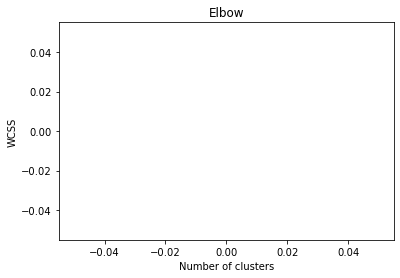

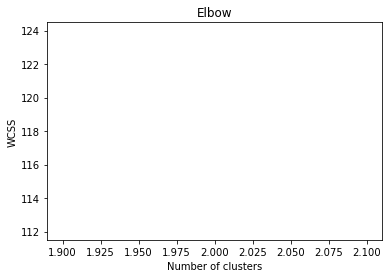

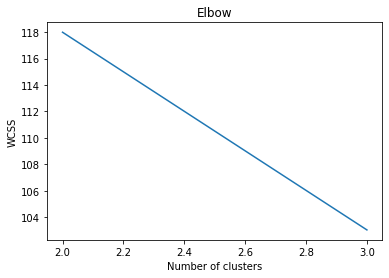

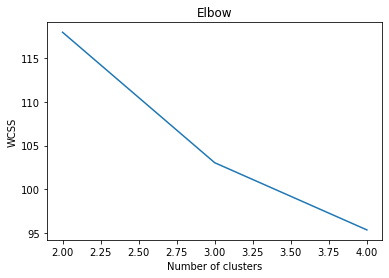

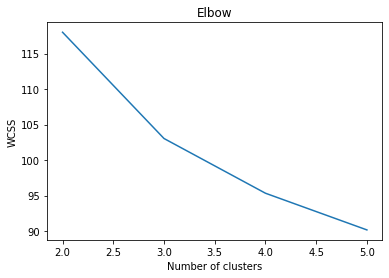


poly


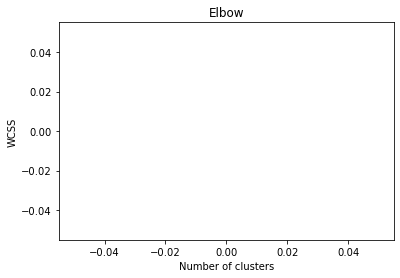

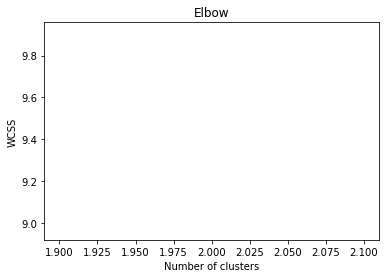

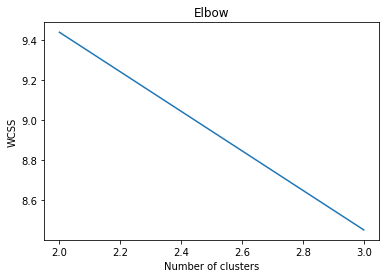

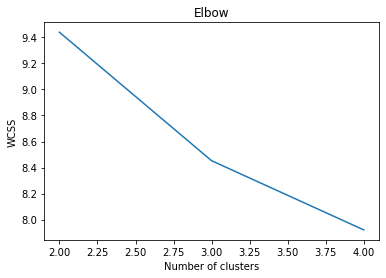

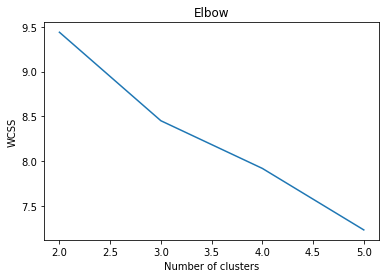


rbf


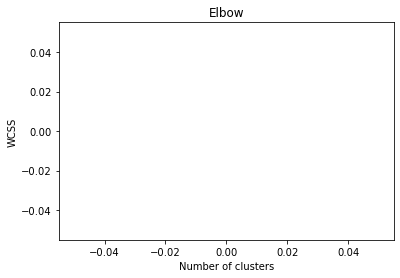

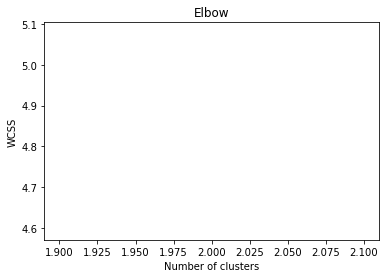

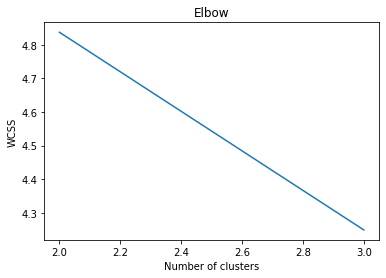

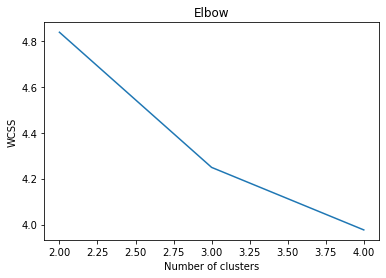

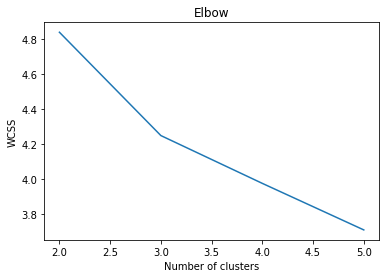


sigmoid


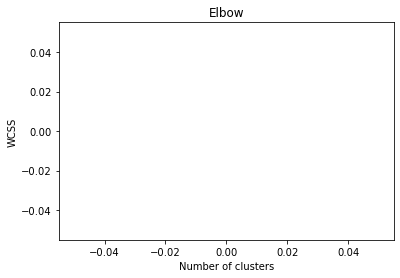

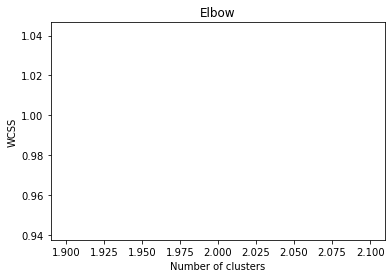

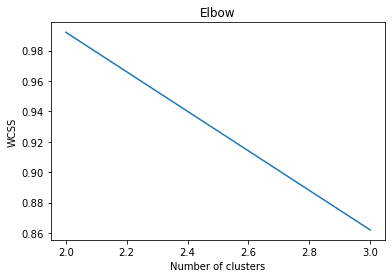

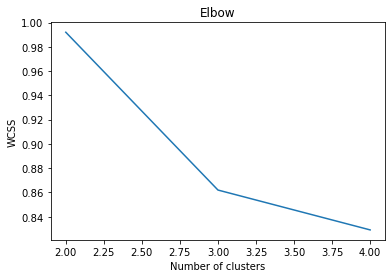

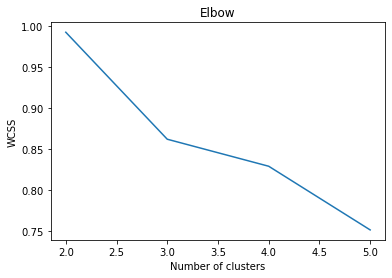


cosine


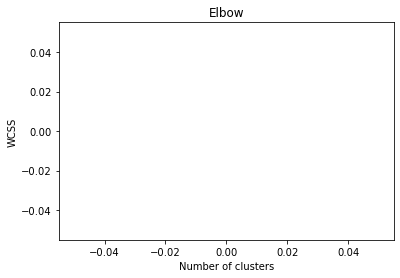

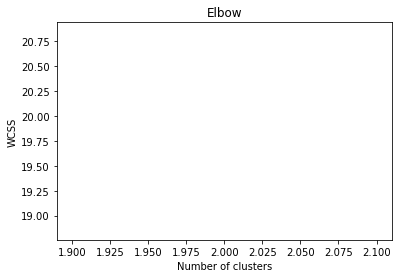

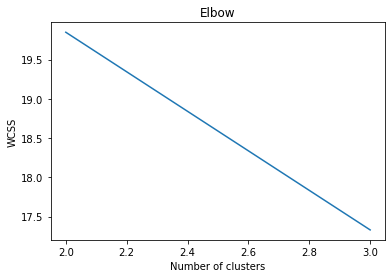

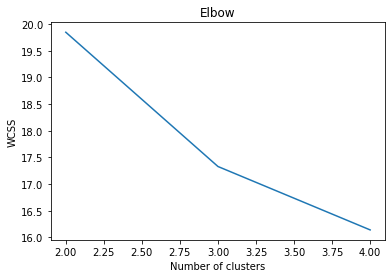

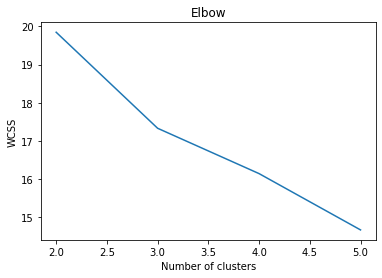

In [53]:
from sklearn.decomposition import PCA, KernelPCA

kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'cosine']

def kpca(kernel):
    pca = KernelPCA(n_components=22, kernel=kernel)
    um = pca.fit_transform(X)
    for i in range(2,7):
        ig(um,i)
#     pca.explained_variance_ratio_


for kernel in kernels:
    print(kernel)
    kpca(kernel)
    print('')

[0.22434179 0.13740582 0.08483459 0.08286961 0.07159398 0.05784945
 0.05196034 0.0396838  0.03412253 0.02793746 0.02546944 0.02350723
 0.02004968 0.01905697 0.01782101 0.01330776 0.01182671 0.01126301
 0.00934365 0.00802477 0.00712445 0.00588648]


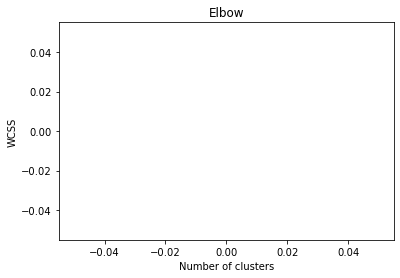

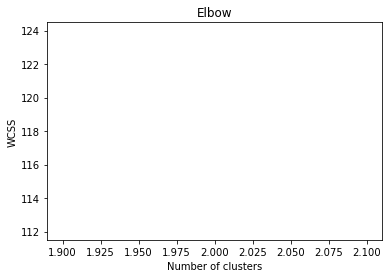

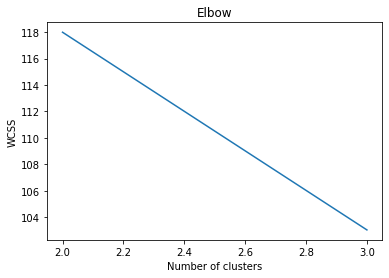

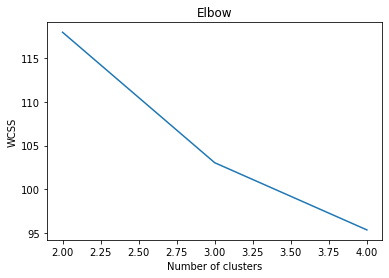

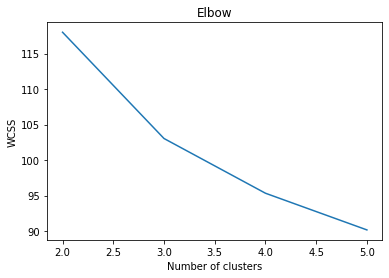

In [57]:
def pca():
    pca = PCA(n_components=22)
    um = pca.fit_transform(X)
    print(pca.explained_variance_ratio_)
    for i in range(2,7):
        ig(um,i)
    
pca()